In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import interpolate
from scipy import special

In [2]:
# Main Dimensions 
L_o = 90 #m
B = 23 #m
D = 8.6 #m
T = 3.4 #m
V_max = 35 #knot
g = 9.81 
# Speeds and Headings
v = np.array([0,17.5,35]) #knot
v = v*0.514444 #m/s
# Route(5)
Tz = 5.5 #s
gamma = 4
Tp = Tz / (0.6673+(0.05037*gamma)-(0.00623*gamma**2)+(0.0003341*gamma**3))
Hs = 1.5 #m
beta = np.array([0,30,60,90,120,150,180])

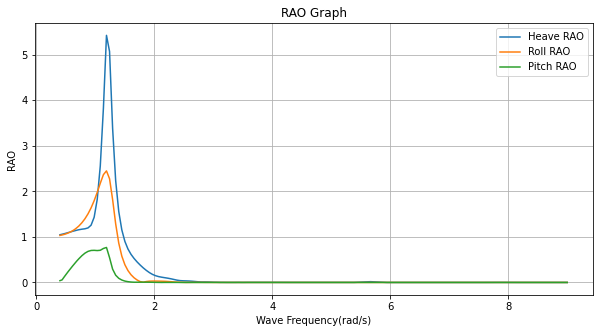

In [3]:
# Reading RAO datas
rao = np.loadtxt('RAO.txt')
rao = np.array_split(rao,21)
# Encounter Frequencies
w_e = []
for i in range(len(rao)):
    for j in range(len(rao[0])):
        w_e.append(rao[i][j][1])
w_e = np.array_split(w_e,21)
w = []
for i in range(len(rao)):
    for j in range(len(rao[0])):
        w.append(rao[i][j][2])
w = np.array_split(w,21)
k = np.array(w)**2/g
# Heave
rao_3 = []
for i in range(len(rao)):
    for j in range(len(rao[0])):
        rao_3.append(rao[i][j][4])
rao_3 = np.array_split(rao_3,21)
# Roll
rao_4 = []
for i in range(len(rao)):
    for j in range(len(rao[0])):
        rao_4.append(rao[i][j][6])
rao_4 = np.array_split(rao_4,21)
# Pitch
rao_5 = []
for i in range(len(rao)):
    for j in range(len(rao[0])):
        rao_5.append(rao[i][j][8])
rao_5 = np.array_split(rao_5,21)
j = 17
plt.figure(figsize=(10,5))
plt.title('RAO Graph')
plt.plot(w[j],rao_3[j],label='Heave RAO')
plt.plot(w[j],rao_4[j],label='Roll RAO')
plt.plot(w[j],rao_5[j],label='Pitch RAO')
plt.xlabel('Wave Frequency(rad/s)')
plt.ylabel('RAO')
plt.grid()
plt.legend()
plt.savefig('rao',dpi=500)
plt.show()

In [4]:
"""
# Frequency Mapping
delta_we=[]
for i in range(len(w_e)):
    for j in range(90):
        delta_we.append(w_e[i][j+1]-w_e[i][j])
delta_we = np.array_split(delta_we,21)
delta_we = np.abs(delta_we)
"""
delta_w = []
for i in range(len(w)):
    for j in range(90):
        delta_w.append(w[i][j+1]-w[i][j])
delta_w = np.array_split(delta_w,21)
delta_w = np.abs(delta_w)
"""
# Spectra Calculation(ITTC) - Two Parameter
A= (123.8*Hs**2)/(Tz**4)
B= 495/(Tz**4)
S_ittc = []
for i in range(len(w)):
    S_ittc.append((A / w[i]**5 ) * np.exp(-B/w[i]**4))
d_w = []
for i in range(len(v)):
    for j in range(len(beta)):
        d_w.append((1-((2*w[i+j]/g)*v[i]*np.cos(np.radians(beta[j])))))
d_w = np.abs(d_w)
S_we = S_ittc / d_w

# Variance Transformation 
S_var_heave = S_ittc*np.array(rao_3)**2
S_var_roll = S_ittc*np.array(rao_4)**2
S_var_pitch = S_ittc*np.array(rao_5)**2
# Spectral Responses
S_heave = S_we*np.array(rao_3)**2
S_roll = S_we*np.array(rao_4)**2
S_pitch = S_we*np.array(rao_5)**2

plt.figure(figsize=(14,7))
plt.plot(w_e[i],S_we[i],label='Ship Spectra')
plt.plot(w_e[i],S_heave[i],label='S_heave')
plt.plot(w_e[i],S_roll[i],label='S_roll')
plt.plot(w_e[i],S_pitch[i],label='S_pitch')
plt.legend()
plt.grid()
plt.show()

i=3
plt.figure(figsize=(14,7))
plt.plot(w[i],S_var_heave[i],label='S_heave(VPM)')
plt.plot(w[i],S_var_roll[i],label='S_roll(VPM)')
plt.plot(w[i],S_var_pitch[i],label='S_pitch(VPM)')
plt.plot(w[i],S_ittc[i],label='Wave Spectra')
plt.grid()
plt.legend()
plt.show()

"""

"\n# Spectra Calculation(ITTC) - Two Parameter\nA= (123.8*Hs**2)/(Tz**4)\nB= 495/(Tz**4)\nS_ittc = []\nfor i in range(len(w)):\n    S_ittc.append((A / w[i]**5 ) * np.exp(-B/w[i]**4))\nd_w = []\nfor i in range(len(v)):\n    for j in range(len(beta)):\n        d_w.append((1-((2*w[i+j]/g)*v[i]*np.cos(np.radians(beta[j])))))\nd_w = np.abs(d_w)\nS_we = S_ittc / d_w\n\n# Variance Transformation \nS_var_heave = S_ittc*np.array(rao_3)**2\nS_var_roll = S_ittc*np.array(rao_4)**2\nS_var_pitch = S_ittc*np.array(rao_5)**2\n# Spectral Responses\nS_heave = S_we*np.array(rao_3)**2\nS_roll = S_we*np.array(rao_4)**2\nS_pitch = S_we*np.array(rao_5)**2\n\nplt.figure(figsize=(14,7))\nplt.plot(w_e[i],S_we[i],label='Ship Spectra')\nplt.plot(w_e[i],S_heave[i],label='S_heave')\nplt.plot(w_e[i],S_roll[i],label='S_roll')\nplt.plot(w_e[i],S_pitch[i],label='S_pitch')\nplt.legend()\nplt.grid()\nplt.show()\n\ni=3\nplt.figure(figsize=(14,7))\nplt.plot(w[i],S_var_heave[i],label='S_heave(VPM)')\nplt.plot(w[i],S_var_rol

In [5]:
# RMS Values - Using Encounter Frequency
# Heave
'''
RMS_3=np.zeros((len(w_e),len(w[0])))
RMS_3_val = np.zeros(len(w_e))
w_e_abs = np.abs(w_e)
for i in range(len(w_e)):
    RMS_3[i][0]=S_heave[i][0]
    RMS_3[i][1:len(w[0])]=list(S_heave[i][1:len(w[0])]*delta_we[i])
    RMS_3_val[i]=integrate.simpson(RMS_3[i],w_e[i])
RMS_3_val = np.array_split(RMS_3_val,3)
# Pitch
RMS_5=np.zeros((len(w_e),len(w[0])))
RMS_5_val = np.zeros(len(w_e))
for i in range(len(w_e)):
    RMS_5[i][0]=S_pitch[i][0]
    RMS_5[i][1:len(w[0])]=list(S_pitch[i][1:len(w[0])]*delta_we[i])
    RMS_5_val[i]=integrate.simpson(RMS_5[i],w_e[i])
RMS_5_val = 57.2958*RMS_5_val
RMS_5_val = np.array_split(RMS_5_val,3)
# Roll
RMS_4=np.zeros((len(w_e),len(w[0])))
RMS_4_val = np.zeros(len(w_e))
for i in range(len(w_e)):
    RMS_4[i][0]=S_roll[i][0]
    RMS_4[i][1:len(w[0])]=list(S_roll[i][1:len(w[0])]*delta_we[i])
    RMS_4_val[i]=integrate.simpson(RMS_4[i],w_e[i])
RMS_4_val = 57.2958*RMS_4_val
RMS_4_val = np.array_split(RMS_4_val,3)

# RMS Values(Variance Preseving Method)
RMS_3_var=np.zeros((len(w),len(w[0])))
RMS_3_val_var = np.zeros(len(w_e))
for i in range(len(w)):
    RMS_3_var[i][0]=S_var_heave[i][0]
    RMS_3_var[i][1:len(w[0])]=list(S_var_heave[i][1:len(w[0])]*delta_w[i])
    RMS_3_val_var[i]=integrate.simpson(RMS_3_var[i],w[i])
RMS_3_val_var = np.array_split(RMS_3_val_var,3)
# Pitch
RMS_5_var=np.zeros((len(w_e),len(w[0])))
RMS_5_val_var = np.zeros(len(w_e))
for i in range(len(w_e)):
    RMS_5_var[i][0]=S_var_pitch[i][0]
    RMS_5_var[i][1:len(w[0])]=list(S_var_pitch[i][1:len(w[0])]*delta_w[i])
    RMS_5_val_var[i]=integrate.simpson(RMS_5_var[i],w[i])
RMS_5_val_var = 57.2958*RMS_5_val_var**0.5
RMS_5_val_var = np.array_split(RMS_5_val_var,3)
# Roll
RMS_4_var=np.zeros((len(w_e),len(w[0])))
RMS_4_val_var = np.zeros(len(w_e))
for i in range(len(w_e)):
    RMS_4_var[i][0]=S_var_roll[i][0]
    RMS_4_var[i][1:len(w[0])]=list(S_var_roll[i][1:len(w[0])]*delta_w[i])
    RMS_4_val_var[i]=integrate.simpson(RMS_4_var[i],w[i])
RMS_4_val_var = 57.2958*RMS_4_val_var**0.5
RMS_4_val_var = np.array_split(RMS_4_val_var,3)
# Vertical Acceleration at aft,L/4,CG,3L/4,bow
x = np.array([(-L_o/2),(-L_o/4),(0),(L_o/4),(L_o/2)])
eta_3 = RMS_3_var / A
eta_5 = RMS_5_var / (k*A*57.2958)
V_acc_l = []
for i in range(len(x)):
    V_acc_l.append(eta_3 + x[i]*eta_5)
V_acc_l_val = []
for i in range(len(x)):
    for j in range(len(RMS_3_var)):
        V_acc_l_val.append(np.sum(V_acc_l[i][j]))
V_acc_l_val = np.array_split(V_acc_l_val,15)
aft_acc = np.array(V_acc_l_val[0:3]) * 0.101972
bow_acc = np.array(V_acc_l_val[12:15]) * 0.101972
cg_acc = np.array(V_acc_l_val[6:9])* 0.101972
# MSI Calculation at CG 
Tz_msi = np.linspace(0.5,12.5,50) #s
gamma = 4
Tp = Tz_msi / (0.6673+(0.05037*gamma)-(0.00623*gamma**2)+(0.0003341*gamma**3))
wp = 2*np.pi/Tp
eta_msi = -0.819 + 2.32*np.log(wp)**2
MSI = []
for i in range(len(cg_acc)):
    for j in range(len(cg_acc[0])):
        MSI.append(100*(0.5+0.5*special.erf((np.log(cg_acc[i][j]/g)-eta_msi)/(0.4*2**0.5))))

i = 15
plt.figure(figsize=(15,7.5))
plt.plot(Tp,MSI[i])
plt.ylabel('MSI(%)')
plt.xlabel('Peak Frequency(We)')
plt.grid()
plt.show()
'''

"\nRMS_3=np.zeros((len(w_e),len(w[0])))\nRMS_3_val = np.zeros(len(w_e))\nw_e_abs = np.abs(w_e)\nfor i in range(len(w_e)):\n    RMS_3[i][0]=S_heave[i][0]\n    RMS_3[i][1:len(w[0])]=list(S_heave[i][1:len(w[0])]*delta_we[i])\n    RMS_3_val[i]=integrate.simpson(RMS_3[i],w_e[i])\nRMS_3_val = np.array_split(RMS_3_val,3)\n# Pitch\nRMS_5=np.zeros((len(w_e),len(w[0])))\nRMS_5_val = np.zeros(len(w_e))\nfor i in range(len(w_e)):\n    RMS_5[i][0]=S_pitch[i][0]\n    RMS_5[i][1:len(w[0])]=list(S_pitch[i][1:len(w[0])]*delta_we[i])\n    RMS_5_val[i]=integrate.simpson(RMS_5[i],w_e[i])\nRMS_5_val = 57.2958*RMS_5_val\nRMS_5_val = np.array_split(RMS_5_val,3)\n# Roll\nRMS_4=np.zeros((len(w_e),len(w[0])))\nRMS_4_val = np.zeros(len(w_e))\nfor i in range(len(w_e)):\n    RMS_4[i][0]=S_roll[i][0]\n    RMS_4[i][1:len(w[0])]=list(S_roll[i][1:len(w[0])]*delta_we[i])\n    RMS_4_val[i]=integrate.simpson(RMS_4[i],w_e[i])\nRMS_4_val = 57.2958*RMS_4_val\nRMS_4_val = np.array_split(RMS_4_val,3)\n\n# RMS Values(Variance 

20.0
8.857142857142858
8.459183673469388


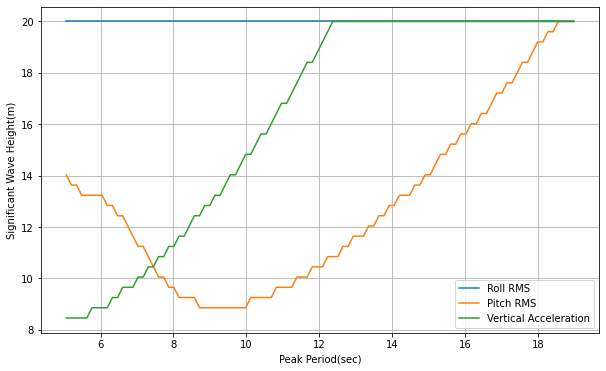

"\n#plt.plot(w[a],S_heave_new[1500],label='Sheave')\nplt.plot(w[a],S_pitch_new[1000],label='Spitch')\nplt.plot(w[a],S_roll_new[1000],label='Sroll')\nplt.xlabel('Frequency')\nplt.ylabel('S')\nplt.legend()\nplt.grid()\nplt.savefig('S',dpi=1000)\nplt.show()\n"

In [12]:
# 0 SPEED 30 HEADING
Tz_new = np.linspace(4,15,100)
gamma = 4
Tp_new = Tz_new / (0.6673+(0.05037*gamma)-(0.00623*gamma**2)+(0.0003341*gamma**3))
Hs_new = np.linspace(0.5,20,50)
# ITTC Two Parameter Spectra Calculation
A_new= []
B_new= []
for i in range(len(Tz_new)):
    B_new.append(495/(Tz_new[i]**4))
    for j in range(len(Hs_new)):
        A_new.append((123.8*Hs_new[j]**2)/(Tz_new[i]**4))        
A_new = np.array_split(A_new,len(Tz_new))
a = 15 # SCENARIOS
S_ittc_new = []
for i in range(len(Tz_new)):
    for j in range(len(Hs_new)):
        S_ittc_new.append((A_new[i][j] / w[a]**5 ) * np.exp(-B_new[i]/w[a]**4))
S_ittc_new = np.array_split(S_ittc_new,len(Tz_new))

# RMS,ACCELERATION AND CRITERIA CALCULATION
# HEAVE
S_heave_new = []
for i in range(len(Tz_new)):
    for j in range(len(Hs_new)):
        S_heave_new.append(S_ittc_new[i][j]*np.array(rao_3[a])**2)
RMS_3_new=np.zeros((len(S_heave_new),len(w[0])))
RMS_3_new_val =np.zeros(len(S_heave_new))
for i in range(len(S_heave_new)):
    RMS_3_new[i][0]=S_heave_new[i][0]
    RMS_3_new[i][1:len(w[0])]=list(S_heave_new[i][1:len(w[0])]*delta_w[a])
    RMS_3_new_val[i]=integrate.simpson(RMS_3_new[i],w[a])
RMS_3_new_val = RMS_3_new_val**0.5
RMS_3_new_val = np.array_split(RMS_3_new_val,len(Tz_new))

# ROLL
S_roll_new = []
for i in range(len(Tz_new)):
    for j in range(len(Hs_new)):
        S_roll_new.append(S_ittc_new[i][j]*np.array(rao_4[a])**2*k[a]**2)
RMS_4_new=np.zeros((len(S_roll_new),len(w[a])))
RMS_4_new_val = np.zeros(len(S_roll_new))
for i in range(len(S_roll_new)):
    RMS_4_new[i][0]=S_roll_new[i][0]
    RMS_4_new[i][1:len(w[0])]=list(S_roll_new[i][1:len(w[0])]*delta_w[a])
    RMS_4_new_val[i]=integrate.simpson(RMS_4_new[i],w[a])
RMS_4_new_val = 57.2958*RMS_4_new_val**0.5
RMS_4_new_val = np.array_split(RMS_4_new_val,len(Tz_new))

# PITCH
S_pitch_new = []
for i in range(len(Tz_new)):
    for j in range(len(Hs_new)):
        S_pitch_new.append(S_ittc_new[i][j]*np.array(rao_5[a])**2*k[a]**2)
RMS_5_new=np.zeros((len(S_pitch_new),len(w[a])))
RMS_5_new_val =np.zeros(len(S_pitch_new))
for i in range(len(S_pitch_new)):
    RMS_5_new[i][0]=S_pitch_new[i][0]
    RMS_5_new[i][1:len(w[0])]=list(S_pitch_new[i][1:len(w[0])]*delta_w[a])
    RMS_5_new_val[i]=integrate.simpson(RMS_5_new[i],w[a])
RMS_5_new_val = 57.2958*RMS_5_new_val**0.5
RMS_5_new_val = np.array_split(RMS_5_new_val,len(Tz_new))

# ACCELERATION AT BOW
S_3 = rao_3[a]+((rao_5[a]*(L_o/2))*k[a])
m_4 = []
for i in range(len(Tz_new)):
    for j in range(len(Hs_new)):
        m_4.append(w[a]**4*S_3*S_ittc_new[i][j])
m_s=np.zeros((len(S_pitch_new),len(w[a])))
m_4_new =np.zeros(len(S_pitch_new))
for i in range(len(S_pitch_new)):
    m_s[i][0]=m_4[i][0]
    m_s[i][1:len(w[0])]=list(m_4[i][1:len(w[0])]*delta_w[a])
    m_4_new[i]=integrate.simpson(m_s[i],w[a])
m_4_new = np.array_split(m_4_new*0.101972,len(Tz_new))
RMS_acc = np.array(m_4_new)**0.5

RMS_4_limit = 4 # DEGREE
RMS_5_limit = 1.5 # DEGREE
v_acc_lim = 0.2 # g

RMS_criteria_4 = []
RMS_criteria_5 = []
acc_criteria = []
index_no = []
for i in range(len(RMS_4_new_val)):
    for j in range(len(RMS_4_new_val[0])):
        if RMS_4_new_val[i][j]<=RMS_4_limit:
            RMS_criteria_4.append(RMS_4_new_val[i][j])
        else:
            RMS_criteria_4.append(0)
        if RMS_5_new_val[i][j]<=RMS_5_limit:
            RMS_criteria_5.append(RMS_5_new_val[i][j])
        else:
            RMS_criteria_5.append(0)
        if RMS_acc[i][j]<=v_acc_lim:
            acc_criteria.append(RMS_acc[i][j])
        else:
            acc_criteria.append(0)
RMS_criteria_4 = np.array_split(RMS_criteria_4,len(Tz_new))
RMS_criteria_5 = np.array_split(RMS_criteria_5,len(Tz_new))
acc_criteria = np.array_split(acc_criteria,len(Tz_new))
RMS_4_list = []
RMS_5_list = []
acc_list = []
index_no_4 = []
index_no_5 = []
index_acc = []
for i in range(len(RMS_criteria_4)):
    RMS_4_list.append(list(RMS_criteria_4[i]))
    RMS_5_list.append(list(RMS_criteria_5[i]))
    acc_list.append(list(acc_criteria[i]))
    index_no_5.append(RMS_5_list[i].index(max(RMS_5_list[i])))
    index_no_4.append(RMS_4_list[i].index(max(RMS_4_list[i])))
    index_acc.append(acc_list[i].index(max(acc_list[i])))

plt.figure(figsize=(10,6))
plt.plot(Tp_new,Hs_new[index_no_4],label = 'Roll RMS')
plt.plot(Tp_new,Hs_new[index_no_5],label = 'Pitch RMS')
plt.plot(Tp_new,Hs_new[index_acc],label='Vertical Acceleration')
plt.xlabel('Peak Period(sec)')
plt.ylabel('Significant Wave Height(m)')
plt.grid()
plt.legend()
plt.savefig('ssssss')
plt.show()

print(min(Hs_new[index_no_4]))
print(min(Hs_new[index_no_5]))
print(min(Hs_new[index_acc]))
'''
#plt.plot(w[a],S_heave_new[1500],label='Sheave')
plt.plot(w[a],S_pitch_new[1000],label='Spitch')
plt.plot(w[a],S_roll_new[1000],label='Sroll')
plt.xlabel('Frequency')
plt.ylabel('S')
plt.legend()
plt.grid()
plt.savefig('S',dpi=1000)
plt.show()
'''

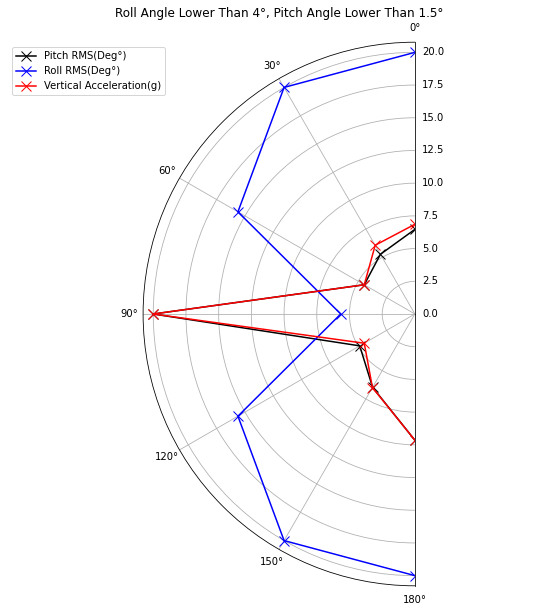

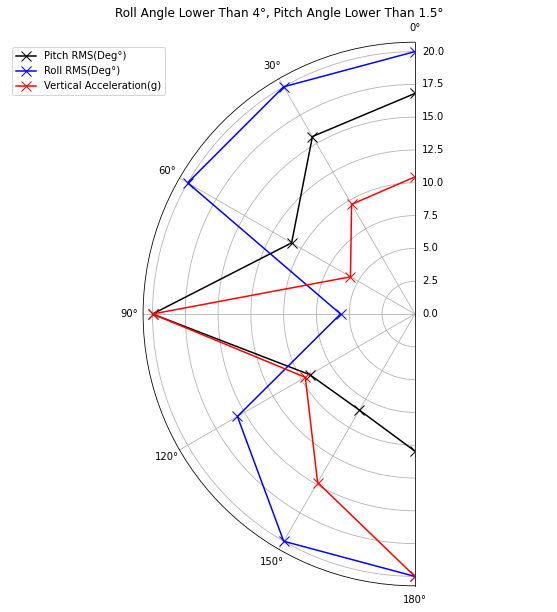

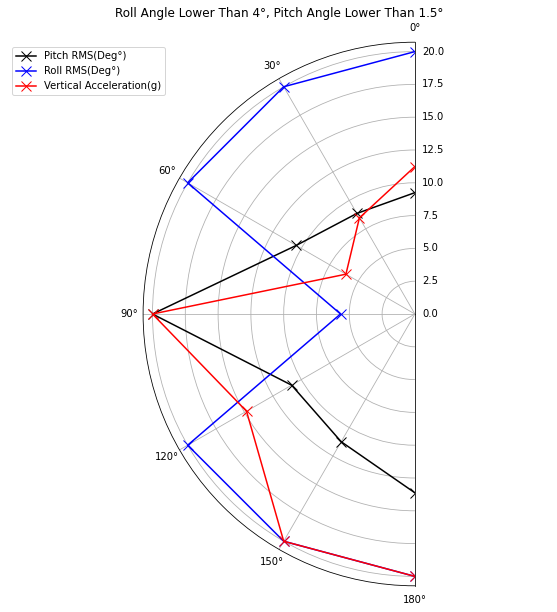

In [71]:
RMS_4 = [20,20,15.62,5.67,15.62,20,20,
         20,20,20,5.67,15.62,20,20,
         20,20,20,5.67,20,20,20]
RMS_5 = [6.47,5.27,4.47,20,4.87,6.47,9.65,
         16.81,15.62,10.85,20,9.25,8.46,10.45,
         9.25,8.85,10.45,20,10.85,11.24,13.63]
vert_acc = [6.86,6.07,4.47,20,4.47,6.49,9.65,
            10.45,9.65,5.67,20,9.65,14.83,20,
            11.24,8.46,6.07,20,14.82,20,20]
RMS_5 = np.array_split(RMS_5,3)
RMS_4 = np.array_split(RMS_4,3)
vert_acc = np.array_split(vert_acc,3)

# Polar Plot
for i in range(len(RMS_4)):
    rads = np.linspace(0,np.pi,len(beta))
    fig, ax = plt.subplots(figsize=(20,10),subplot_kw={'projection': 'polar'})
    plt.title('Roll Angle Lower Than 4°, Pitch Angle Lower Than 1.5°')
    ax.plot(rads, RMS_5[i],'xk-',markersize=10,label ='Pitch RMS(Deg°)')
    ax.plot(rads,RMS_4[i],'xb-',markersize=10,label='Roll RMS(Deg°)')
    ax.plot(rads,vert_acc[i],'xr-',markersize=10,label='Vertical Acceleration(g)')
    ax.set_theta_zero_location("N")
    ax.set_thetamin(0)
    ax.set_thetamax(180)
    ax.grid(True)
    plt.legend()
 #   plt.savefig('polar',dpi=500)
    plt.show()